## Airline flight delays


#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- The aim of the project is to understand which factors contribute to flight delays.


### 2) Data Collection
- Dataset Source - https://www.transtats.bts.gov/DL_SelectFields.aspx?gnoyr_VQ=FGK&QO_fu146_anzr=b0-gvzr  
- The data consists of 12 csv files for between Aug 2022 to Aug 2023.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [63]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib
!pip install scikit-learn
!pip install dill


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [31]:
import pandas as pd

# Hardcoding the file names
file_names = [
    'Aug2022.csv',
    'Sept2022.csv',
    'Oct2022.csv',
    'Nov2022.csv',
    'Dec2022.csv',
    'Jan2023.csv',
    'Feb2023.csv',
    'Mar2023.csv',
    'April2023.csv',
    'May2023.csv',
    'Jun2023.csv',
    'Jul2023.csv',
    'Aug2023.csv',
]

# Reading each file into a DataFrame
dataframes = [pd.read_csv(file_name) for file_name in file_names]

# Combining all DataFrames into a single DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)

combined_df 

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,MKT_UNIQUE_CARRIER,MKT_CARRIER,OP_UNIQUE_CARRIER,TAIL_NUM,...,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,CRS_DEP_TIME,DEP_DELAY_NEW,DISTANCE,DISTANCE_GROUP
0,2022,3,8,1,1,8/1/2022 12:00:00 AM,AA,AA,AA,N101NN,...,JFK,"New York, NY",10721,BOS,"Boston, MA",MA,2135,0.0,187.0,1
1,2022,3,8,1,1,8/1/2022 12:00:00 AM,AA,AA,AA,N101NN,...,JFK,"New York, NY",12892,LAX,"Los Angeles, CA",CA,730,0.0,2475.0,10
2,2022,3,8,1,1,8/1/2022 12:00:00 AM,AA,AA,AA,N101NN,...,LAX,"Los Angeles, CA",12478,JFK,"New York, NY",NY,1200,0.0,2475.0,10
3,2022,3,8,1,1,8/1/2022 12:00:00 AM,AA,AA,AA,N102NN,...,JFK,"New York, NY",12892,LAX,"Los Angeles, CA",CA,1845,16.0,2475.0,10
4,2022,3,8,1,1,8/1/2022 12:00:00 AM,AA,AA,AA,N102NN,...,LAX,"Los Angeles, CA",12478,JFK,"New York, NY",NY,900,0.0,2475.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
840772,2023,3,8,31,4,8/31/2023 12:00:00 AM,WN,WN,WN,N909WN,...,STL,"St. Louis, MO",12953,LGA,"New York, NY",NY,700,6.0,888.0,4
840773,2023,3,8,31,4,8/31/2023 12:00:00 AM,WN,WN,WN,N937WN,...,ISP,"Islip, NY",10821,BWI,"Baltimore, MD",MD,1235,3.0,220.0,1
840774,2023,3,8,31,4,8/31/2023 12:00:00 AM,WN,WN,WN,N937WN,...,MCO,"Orlando, FL",12391,ISP,"Islip, NY",NY,930,9.0,971.0,4
840775,2023,3,8,31,4,8/31/2023 12:00:00 AM,WN,WN,WN,N952WN,...,LGA,"New York, NY",13232,MDW,"Chicago, IL",IL,600,0.0,725.0,3


#### Summary of the dataset

### 2.2 Dataset information

- YEAR 2022 to 2023	
- QUARTER 1 2 3 or 4	
- MONTH Aug to Aug 
- DAY_OF_MONTH 1 to 31	
- DAY_OF_WEEK 1 to 7	
- ORIGIN_AIRPORT_ID 	
- DEST_AIRPORT_ID	
- CRS_DEP_TIME 24 hours format
- DEP_DELAY_NEW	0 to 3238 mins
- DISTANCE 100 to 4983	
- DISTANCE_GROUP 1 to 11

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [32]:
combined_df.isna().sum()

YEAR                      0
QUARTER                   0
MONTH                     0
DAY_OF_MONTH              0
DAY_OF_WEEK               0
FL_DATE                   0
MKT_UNIQUE_CARRIER        0
MKT_CARRIER               0
OP_UNIQUE_CARRIER         0
TAIL_NUM               2441
ORIGIN_AIRPORT_ID         0
ORIGIN                    0
ORIGIN_CITY_NAME          0
DEST_AIRPORT_ID           0
DEST                      0
DEST_CITY_NAME            0
DEST_STATE_ABR            0
CRS_DEP_TIME              0
DEP_DELAY_NEW         22298
DISTANCE                  0
DISTANCE_GROUP            0
dtype: int64

In [33]:
combined_df = combined_df.dropna()
combined_df.isna().sum()

YEAR                  0
QUARTER               0
MONTH                 0
DAY_OF_MONTH          0
DAY_OF_WEEK           0
FL_DATE               0
MKT_UNIQUE_CARRIER    0
MKT_CARRIER           0
OP_UNIQUE_CARRIER     0
TAIL_NUM              0
ORIGIN_AIRPORT_ID     0
ORIGIN                0
ORIGIN_CITY_NAME      0
DEST_AIRPORT_ID       0
DEST                  0
DEST_CITY_NAME        0
DEST_STATE_ABR        0
CRS_DEP_TIME          0
DEP_DELAY_NEW         0
DISTANCE              0
DISTANCE_GROUP        0
dtype: int64

In [34]:
combined_df.shape

(818479, 21)

#### There are no missing values in the data set

### 3.2 Check Duplicates

In [35]:
combined_df.duplicated().sum()

66489

In [36]:
# Remove duplicate rows
combined_df = combined_df.drop_duplicates()

# Check if there are any duplicates left
num_duplicates = combined_df.duplicated().sum()
print(f"Number of duplicate rows after removal: {num_duplicates}")


Number of duplicate rows after removal: 0


#### There are no duplicates  values in the data set

### 3.3 Check data types

In [37]:
# Check Null and Dtypes
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 751990 entries, 0 to 840776
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   YEAR                751990 non-null  int64  
 1   QUARTER             751990 non-null  int64  
 2   MONTH               751990 non-null  int64  
 3   DAY_OF_MONTH        751990 non-null  int64  
 4   DAY_OF_WEEK         751990 non-null  int64  
 5   FL_DATE             751990 non-null  object 
 6   MKT_UNIQUE_CARRIER  751990 non-null  object 
 7   MKT_CARRIER         751990 non-null  object 
 8   OP_UNIQUE_CARRIER   751990 non-null  object 
 9   TAIL_NUM            751990 non-null  object 
 10  ORIGIN_AIRPORT_ID   751990 non-null  int64  
 11  ORIGIN              751990 non-null  object 
 12  ORIGIN_CITY_NAME    751990 non-null  object 
 13  DEST_AIRPORT_ID     751990 non-null  int64  
 14  DEST                751990 non-null  object 
 15  DEST_CITY_NAME      751990 non-null  ob

### 3.4 Checking the number of unique values of each column

In [38]:
combined_df.nunique()

YEAR                     2
QUARTER                  4
MONTH                   11
DAY_OF_MONTH            31
DAY_OF_WEEK              7
FL_DATE                365
MKT_UNIQUE_CARRIER      10
MKT_CARRIER             10
OP_UNIQUE_CARRIER       20
TAIL_NUM              5567
ORIGIN_AIRPORT_ID      125
ORIGIN                 125
ORIGIN_CITY_NAME       121
DEST_AIRPORT_ID        125
DEST                   125
DEST_CITY_NAME         121
DEST_STATE_ABR          44
CRS_DEP_TIME          1157
DEP_DELAY_NEW         1215
DISTANCE               276
DISTANCE_GROUP          11
dtype: int64

In [39]:
# Filter the DataFrame to keep only rows where DEP_DELAY_NEW is 180 or less
combined_df = combined_df[combined_df['DEP_DELAY_NEW'] <= 180]

# Set any negative values in DEP_DELAY_NEW to 0
combined_df['DEP_DELAY_NEW'] = combined_df['DEP_DELAY_NEW'].clip(lower=0)

combined_df=combined_df.drop(columns=['YEAR','ORIGIN_CITY_NAME','FL_DATE','DEST_CITY_NAME','MKT_UNIQUE_CARRIER','MKT_CARRIER','DEST_STATE_ABR','DISTANCE_GROUP', 'TAIL_NUM', 'ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID','DISTANCE','QUARTER','DAY_OF_MONTH'],axis=1)
# Save the cleaned DataFrame to a CSV file
combined_df


,MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY_NEW
0,8,1,AA,JFK,BOS,2135,0.0
1,8,1,AA,JFK,LAX,730,0.0
2,8,1,AA,LAX,JFK,1200,0.0
3,8,1,AA,JFK,LAX,1845,16.0
4,8,1,AA,LAX,JFK,900,0.0
...,...,...,...,...,...,...,...
840772,8,4,WN,STL,LGA,700,6.0
840773,8,4,WN,ISP,BWI,1235,3.0
840774,8,4,WN,MCO,ISP,930,9.0
840775,8,4,WN,LGA,MDW,600,0.0


### 3.5 Check statistics of data set

In [40]:
# Selecting specific columns for the summary
columns_to_describe = [ 'MONTH', 'DAY_OF_WEEK', 
                       'DEP_DELAY_NEW']

# Applying describe() to only these columns
summary = combined_df[columns_to_describe].describe()


combined_df['MONTH'] = combined_df['MONTH'].astype('object')
combined_df['DAY_OF_WEEK'] = combined_df['DAY_OF_WEEK'].astype('object')


combined_df = combined_df.dropna()

# To drop rows in place
combined_df.dropna(inplace=True)

# List of allowed origins
allowed_origins = ['JFK', 'EWR', 'LGA', 'HPN']
combined_df = combined_df[combined_df['ORIGIN'].isin(allowed_origins)]
combined_df = combined_df[combined_df['DEST'] == 'ORD']
combined_df.to_csv('flights_cleaned.csv', index=False)

In [41]:
combined_df

,MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY_NEW
58,8,1,AA,LGA,ORD,1730,0.0
65,8,1,AA,JFK,ORD,845,0.0
66,8,1,AA,JFK,ORD,1555,0.0
116,8,1,AA,LGA,ORD,1130,0.0
127,8,1,AA,LGA,ORD,1430,8.0
...,...,...,...,...,...,...,...
840562,8,4,UA,LGA,ORD,1005,6.0
840571,8,4,UA,LGA,ORD,1824,8.0
840580,8,4,UA,LGA,ORD,1711,28.0
840582,8,4,UA,LGA,ORD,1405,0.0


In [29]:
# Checking for missing values in each column
missing_values = combined_df.isna().sum()

# Printing the number of missing values in each column
print(missing_values)


QUARTER              0
MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
OP_UNIQUE_CARRIER    0
ORIGIN               0
DEST                 0
CRS_DEP_TIME         0
DEP_DELAY_NEW        0
dtype: int64


#### Insight
- DISTANCE Average Distance: The mean flight distance is approximately 848.87 miles. This suggests that the dataset includes a mix of short-haul and medium-haul flights, with fewer long-haul flights (which are typically above 2,500 miles).
- DEP_DELAY_NEW The average (mean) departure delay is approximately 12.32 minutes. However, there is significant variability in delay times, as indicated by a standard deviation of about 28.38 minutes. The median (50th percentile) delay is 0 minutes, suggesting that more than half of the flights depart on time or with negligible delay. The maximum delay recorded is 180 minutes (3 hours), indicating extreme cases of delay. 75% of the flights have a delay of 9 minutes or less, which implies that longer delays are less common.
- DAY_OF_WEEK: The mean value of approximately 3.88 suggests that, on average, the data is slightly skewed towards the earlier part of the week (Monday to Wednesday). This could indicate a higher frequency of flights during these days. Airlines and airports could use this information for better resource allocation. For example, if Monday mornings are prone to higher delays, additional staff or resources could be planned in anticipation.

### 3.7 Exploring Data

In [14]:
combined_df.head()

,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY_NEW,DISTANCE
0,3,8,1,1,AA,JFK,BOS,2135,0.0,187.0
1,3,8,1,1,AA,JFK,LAX,730,0.0,2475.0
3,3,8,1,1,AA,JFK,LAX,1845,16.0,2475.0
6,3,8,1,1,AA,JFK,LAX,1130,0.0,2475.0
12,3,8,1,1,AA,JFK,LAX,1030,0.0,2475.0


In [15]:
print("Unique values in 'QUARTER' variable: ", end=" ")
print(combined_df['QUARTER'].unique())

print("Unique values in 'MONTH' variable: ", end=" ")
print(combined_df['MONTH'].unique())

print("Unique values in 'DAY_OF_MONTH' variable: ", end=" ")
print(combined_df['DAY_OF_MONTH'].unique())

print("Unique values in 'DAY_OF_WEEK' variable: ", end=" ")
print(combined_df['DAY_OF_WEEK'].unique())

print("Unique values in 'OP_UNIQUE_CARRIER' variable: ", end=" ")
print(combined_df['OP_UNIQUE_CARRIER'].unique())

print("Unique values in 'ORIGIN' variable: ", end=" ")
print(combined_df['ORIGIN'].unique())

print("Unique values in 'DEST' variable: ", end=" ")
print(combined_df['DEST'].unique())

Unique values in 'QUARTER' variable:  [3 4 2 1]
Unique values in 'MONTH' variable:  [8 9 10 11 12 5 2 3 4 6 7]
Unique values in 'DAY_OF_MONTH' variable:  [1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31]
Unique values in 'DAY_OF_WEEK' variable:  [1 2 3 4 5 6 7]
Unique values in 'OP_UNIQUE_CARRIER' variable:  ['AA' 'OH' 'OO' 'YX' 'AS' 'B6' '9E' 'DL' 'F9' 'HA' 'NK' 'G7' 'UA' 'YV'
 'WN' 'MQ']
Unique values in 'ORIGIN' variable:  ['JFK' 'LGA' 'HPN' 'EWR']
Unique values in 'DEST' variable:  ['BOS' 'LAX' 'SFO' 'SNA' 'DCA' 'STL' 'DFW' 'MIA' 'PHX' 'ORD' 'AUS' 'CLT'
 'RDU' 'IAH' 'LAS' 'STT' 'FLL' 'IND' 'CMH' 'CLE' 'BNA' 'MEM' 'ORF' 'XNA'
 'PIT' 'ILM' 'SDF' 'CVG' 'MSP' 'RIC' 'GSO' 'OMA' 'DTW' 'ATL' 'CHO' 'BWI'
 'OKC' 'ORH' 'MCI' 'ROA' 'DAY' 'SEA' 'PDX' 'SAN' 'PWM' 'SAV' 'CHS' 'JAX'
 'PBI' 'MCO' 'ONT' 'SJU' 'BUR' 'RSW' 'ACK' 'HYA' 'SYR' 'BTV' 'BUF' 'ROC'
 'MKE' 'MVY' 'TPA' 'DEN' 'MSY' 'SLC' 'ABQ' 'SAT' 'BQN' 'RNO' 'SRQ' 'SJC'
 'SMF' 'MSN' 'IAD' 'ALB' 'GSP' 'BG

In [16]:
import pandas as pd

# Assuming combined_df is your DataFrame
# Filter for flights departing from New York airports, during weekdays, in the morning, and with a distance greater than 400 miles
ny_morning_weekday_flights = combined_df[
    (combined_df['ORIGIN'].isin(['JFK', 'LGA', 'EWR', 'HPN'])) &
    (combined_df['DAY_OF_WEEK'].between(1, 5)) &
    (combined_df['CRS_DEP_TIME'].between(500, 1200)) &
    (combined_df['DISTANCE'] >250)
]

# Group by airport and calculate average departure delay
avg_delays = ny_morning_weekday_flights.groupby('ORIGIN')['DEP_DELAY_NEW'].mean()

# Sort the delays to find the top 4 airports with the lowest average delay
top_airports = avg_delays.nsmallest(4)

print("Top 4 airports in New York with the lowest average departure delays for morning flights during weekdays (distance > 250 miles):")
print(top_airports)

Top 4 airports in New York with the lowest average departure delays for morning flights during weekdays (distance > 250 miles):
ORIGIN
EWR    5.412541
LGA    6.424754
HPN    7.518677
JFK    8.178363
Name: DEP_DELAY_NEW, dtype: float64


#####  Insights
 - Choice of Airport: For travelers prioritizing minimal delays, especially for morning flights over 250 miles, EWR emerges as the best option among the four, followed by LGA.
- Distance Considerations: While EWR offers the least delays, its distance from Manhattan might be a factor for travelers located in New York City. LGA, being closer, offers a good balance between proximity and delay times.
- Flight Type and Volume: The type of flights (domestic vs. international) and the volume of traffic could be influencing factors. JFK's higher delay average might be partly due to its status as a major international hub.
- Airport Size and Resources: Smaller airports like HPN, despite being farther from the city, can sometimes offer more predictable experiences but might also struggle with resources during peak times or under challenging conditions.


### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average delays by weekday for the 4 NY airports. 
- Bar chart


#### 4.1.1 Bar chart

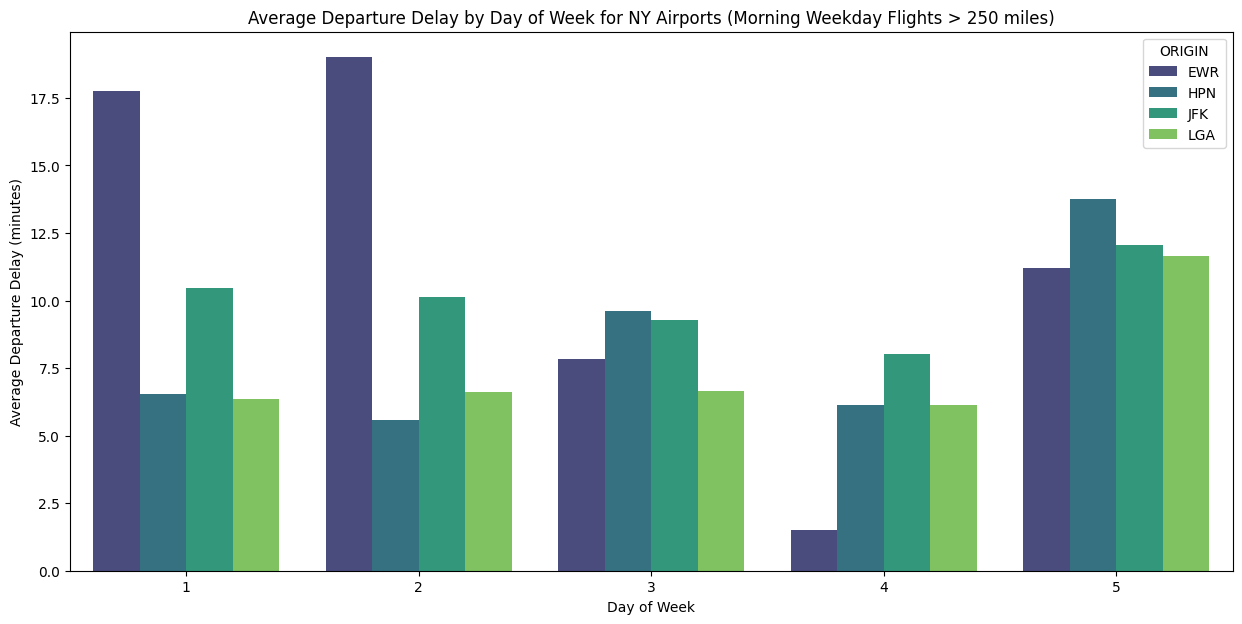

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming combined_df is your DataFrame
# Filter for flights departing from New York airports, during weekdays, in the morning, and with a distance greater than 250 miles
ny_morning_weekday_flights = combined_df[
    (combined_df['ORIGIN'].isin(['JFK', 'LGA', 'EWR', 'HPN'])) &
    (combined_df['DAY_OF_WEEK'].between(1, 5)) &
    (combined_df['CRS_DEP_TIME'].between(500, 1200)) &
    (combined_df['DISTANCE'] > 250)
]

# Group by airport and day of the week, then calculate average departure delay
avg_delays_by_day = ny_morning_weekday_flights.groupby(['ORIGIN', 'DAY_OF_WEEK'])['DEP_DELAY_NEW'].mean().reset_index()

# Set up the matplotlib figure
plt.figure(figsize=(15, 7))

# Create a bar chart
sns.barplot(data=avg_delays_by_day, x='DAY_OF_WEEK', y='DEP_DELAY_NEW', hue='ORIGIN', palette='viridis')
plt.title('Average Departure Delay by Day of Week for NY Airports (Morning Weekday Flights > 250 miles)')
plt.xlabel('Day of Week')
plt.ylabel('Average Departure Delay (minutes)')

# Display the plot
plt.show()

#####  Insights
- Summary: Monday is the day with the highest average delays across all airports, which could be due to the increased volume of traffic as people begin their work week. Tuesday generally sees a reduction in delays, possibly due to less travel following the Monday rush. Wednesday and Thursday have varying patterns, but there is a clear trend of increasing delays leading up to Friday, which could be attributed to the end-of-week travel surge. For travelers looking to avoid delays, flying out of HPN on a Tuesday might provide the best chance for an on-time departure, while EWR should be avoided on Mondays and Fridays if possible.

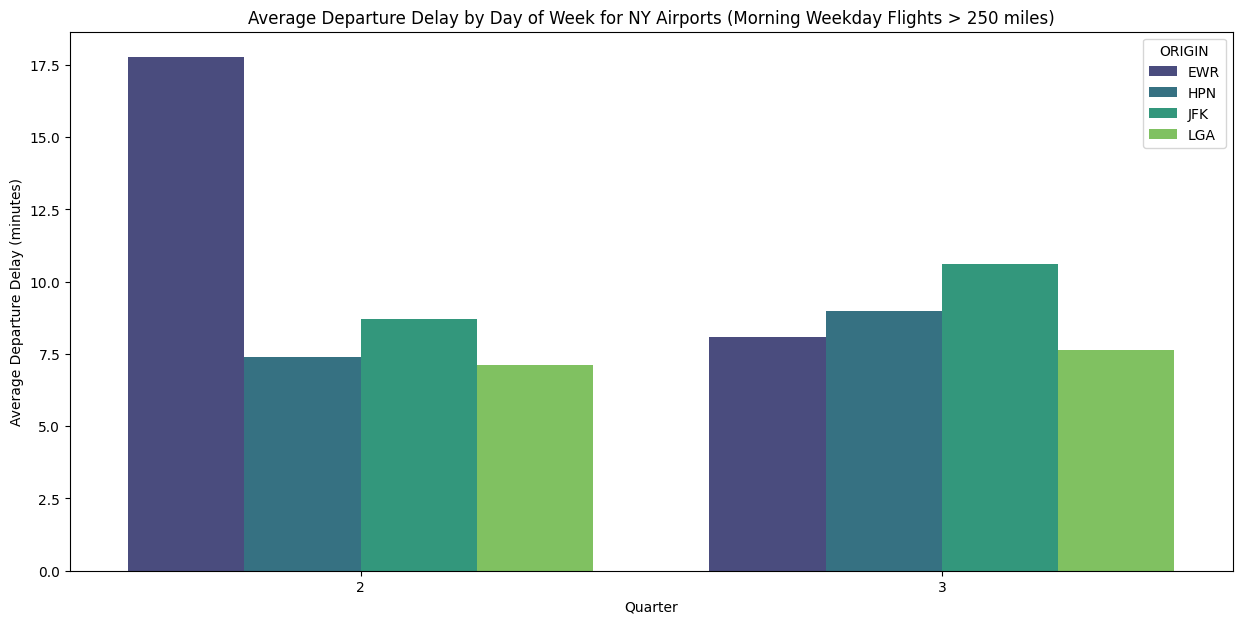

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming combined_df is your DataFrame
# Filter for flights departing from New York airports, during weekdays, in the morning, and with a distance greater than 250 miles
ny_morning_weekday_flights = combined_df[
    (combined_df['ORIGIN'].isin(['JFK', 'LGA', 'EWR', 'HPN'])) &
    (combined_df['DAY_OF_WEEK'].between(1, 5)) &
    (combined_df['CRS_DEP_TIME'].between(500, 1200)) &
    (combined_df['DISTANCE'] > 250)
]

# Group by airport and day of the week, then calculate average departure delay
avg_delays_by_day = ny_morning_weekday_flights.groupby(['ORIGIN', 'QUARTER'])['DEP_DELAY_NEW'].mean().reset_index()

# Set up the matplotlib figure
plt.figure(figsize=(15, 7))

# Create a bar chart
sns.barplot(data=avg_delays_by_day, x='QUARTER', y='DEP_DELAY_NEW', hue='ORIGIN', palette='viridis')
plt.title('Average Departure Delay by Day of Week for NY Airports (Morning Weekday Flights > 250 miles)')
plt.xlabel('Quarter')
plt.ylabel('Average Departure Delay (minutes)')

# Display the plot
plt.show()

- Best Performing Airport Overall: LaGuardia Airport (LGA) seems to consistently offer the lowest average departure delays across all quarters when compared to the other airports. Passengers prioritizing punctuality might consider choosing flights from LGA for better on-time performance.
- Quarterly Performance: For passengers traveling in the second and fourth quarters, Westchester County Airport (HPN) appears to be a good option as it shows lower delays compared to the other airports in these periods. This could be due to seasonal effects or operational efficiencies specific to those times of the year at HPN.

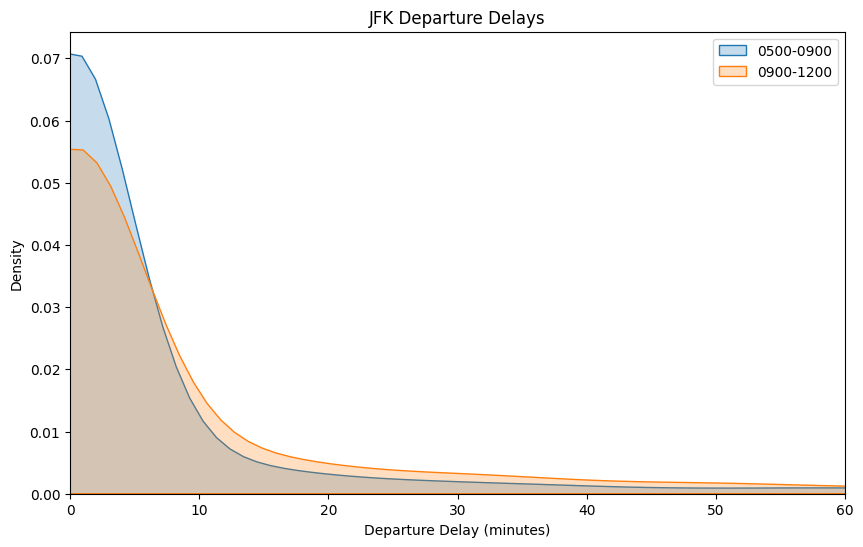

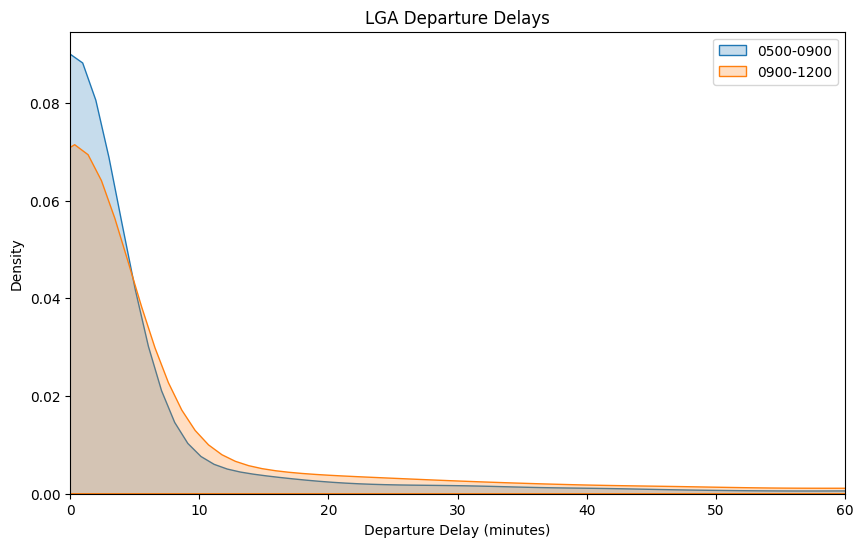

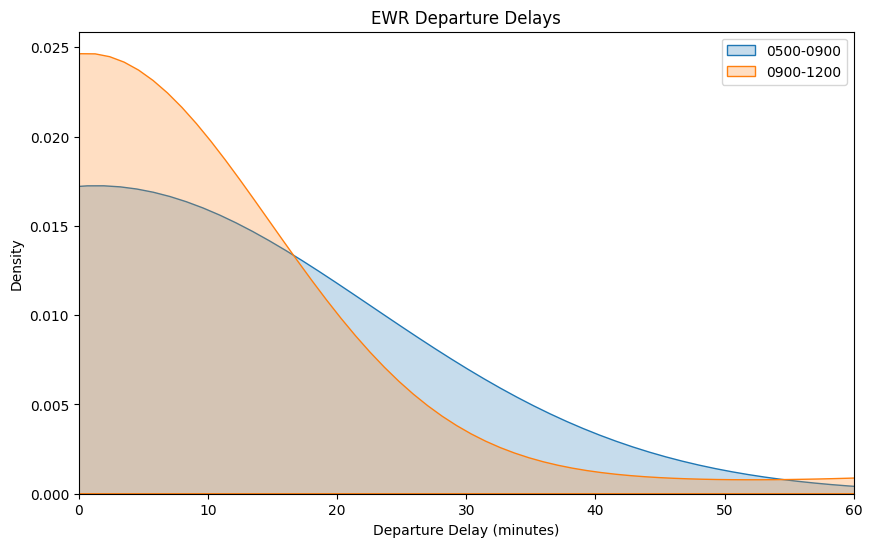

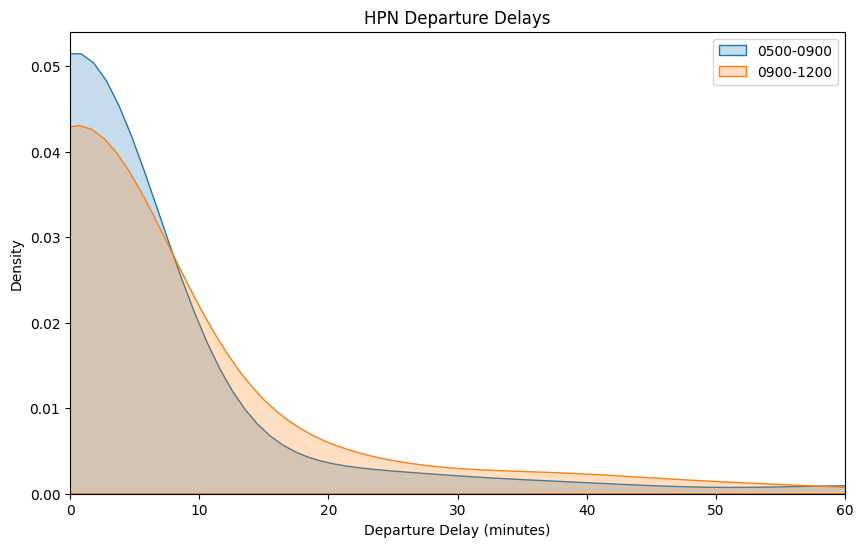

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming combined_df is your DataFrame
# Filter for flights departing from New York airports, during weekdays, and with a distance greater than 250 miles
ny_morning_weekday_flights = combined_df[
    (combined_df['ORIGIN'].isin(['JFK', 'LGA', 'EWR', 'HPN'])) &
    (combined_df['DAY_OF_WEEK'].between(1, 5)) &
    (combined_df['DISTANCE'] > 250)
]

# Further filter for two time windows: 0500-0900 and 0900-1200
early_morning_flights = ny_morning_weekday_flights[ny_morning_weekday_flights['CRS_DEP_TIME'].between(500, 900)]
late_morning_flights = ny_morning_weekday_flights[ny_morning_weekday_flights['CRS_DEP_TIME'].between(900, 1200)]

# Iterate over each airport and create individual plots
for airport in ['JFK', 'LGA', 'EWR', 'HPN']:
    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
    sns.kdeplot(data=early_morning_flights[early_morning_flights['ORIGIN'] == airport], x='DEP_DELAY_NEW', fill=True, label='0500-0900')
    sns.kdeplot(data=late_morning_flights[late_morning_flights['ORIGIN'] == airport], x='DEP_DELAY_NEW', fill=True, label='0900-1200')
    plt.title(f'{airport} Departure Delays')
    plt.xlabel('Departure Delay (minutes)')
    plt.ylabel('Density')
    plt.xlim(0, 60)  # Set the x-axis limit to 0-60 minutes
    plt.legend()
    plt.show()


#####  Insights
- In summary, across all airports, early morning flights tend to have a higher likelihood of shorter delays, while delays are generally more common and can be longer in the late morning. For the lowest probability of delays, it seems advisable for aircraft to depart before 9 AM. EWR has an equal amount of delays for early and late morning flights.


### 5. Conclusions
